# What we're going to cover
* getting a custom dataset with PyTorch
* Preparing and Visalising the data
* Transforming data for use with a model
* loading custom data with pre-built functions and custum functions
* Building FoodVisiion Mini to classify images
* Comparing the models with without data argggumentation
* Making prediction on custom data

## Domian libraries
Depending on what you're working in, vision , test, audio, recommendation , you'll want to look into  each of the PyTorch domain libraries for existing data loading function and cutomizable data loading functions.

In [ ]:
# importing pytorch
import torch
from torch import nn

In [ ]:
# set up device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# downloadingg the  custom data

Our data is a subset of the Food101 datasets.

Food101 start 101 different classes of food.

our dataset start with 3 classes of food and only 10% of the images .




In [ ]:
import requests
import zipfile

from pathlib import Path

# setip path to a data folder
MODULE_PATH = Path('data/')
image_path  = MODULE_PATH/ 'pizza_steak_sushi'


# if the image folder does't exsis, download it and prepare it
if image_path.is_dir():
    print(f"{image_path} directory already exsists... skipping download")
else:
    print(f"{image_path} does not exsist , creating one... ")
    image_path.mkdir(parents=True, exist_ok=True)

with open(MODULE_PATH/'pizza_steak_suchi.zip', 'wb') as f:
    request = requests.get(url='https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print("Downloading Pizza , steak, suchi data....")
    f.write(request.content)

with zipfile.ZipFile(MODULE_PATH/'pizza_steak_suchi.zip', 'r') as zip_ref:
    print('Unzipping pizza , steak and sushi data... ')
    zip_ref.extractall(image_path)



data/pizza_steak_sushi directory already exsists... skipping download
Unzipping pizza , steak and sushi data... 


In [ ]:
from posixpath import dirname
# Data preparationa and exploration
import os
def walk_through_dir(dir_path):
    """ Walks through sir_path returning its content"""
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"There are {len(dirname)} directories and {len(filenames)} images in '{dirpath}'")


In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'


In [ ]:
# set up train and test folders
train_dir = image_path/'train'
test_dir = image_path/'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# visualizing an image

1. get all the image path
2. Pick a random image path
3. Get the image class name
4. open image with python's PIL (pillow)
5. show image and printmeta data


In [ ]:
import random
from PIL import Image

# set random seed
random.seed(42)

# 1. Get all image path
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/27415.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1882831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/690177.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1302563.jpg'),
 PosixPath('data/pizza_steak_sus

data/pizza_steak_sushi/test/pizza/194643.jpg
 Random image path :data/pizza_steak_sushi/test/pizza/194643.jpg
Image class :pizza
Image height: 512
Image width :382


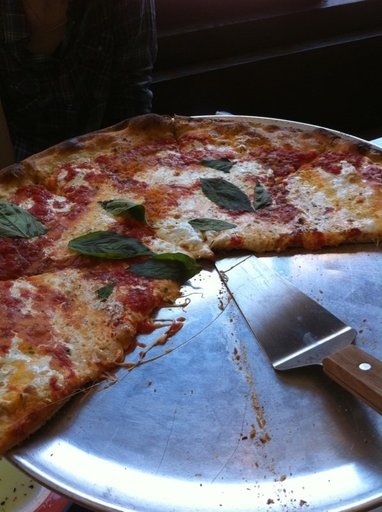

In [ ]:
# pick a random image path
# random.seed(42)
random_image_path = random.choice(image_path_list)
print(random_image_path)

# print the image class using pathlib parent , stemp
image_class = random_image_path.parent.stem
image_class

# print the image
img = Image.open(random_image_path)

#5. print the meta data
print(f" Random image path :{random_image_path}")
print(f"Image class :{image_class}")
print(f"Image height: {img.height}")
print(f"Image width :{img.width}")
img

(-0.5, 381.5, 511.5, -0.5)

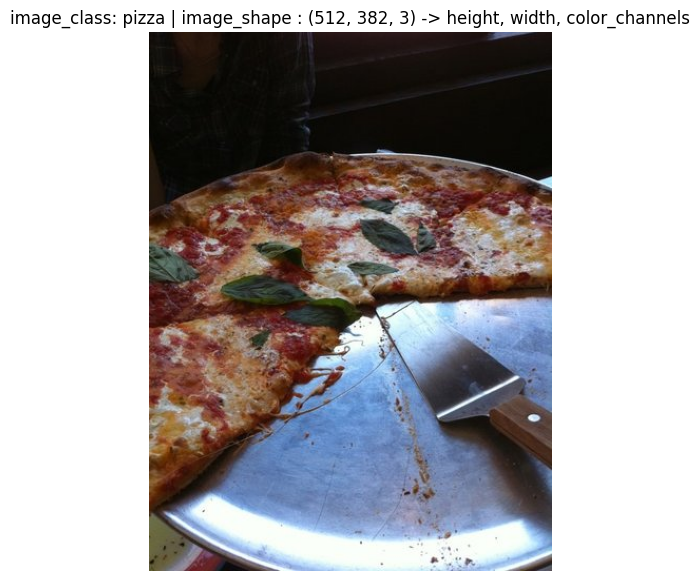

In [ ]:
# visualize with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# turn the image into a array

img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"image_class: {image_class} | image_shape : {img_as_array.shape} -> height, width, color_channels")
plt.axis(False)

##3. Tranforming data
1. Turn your target data into tensors
2. Turn it into a `torch.utils.data.Datasets` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Datasets` and `DataLoader`

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


## 3.1 transforming data with torchvision.transforms

In [ ]:
data_transorms = transforms.Compose([
    #Resize our images to 64*64
    transforms.Resize(size=(64,64)),

    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p is proba

    # Turn the image into a tensor.Tensor
    transforms.ToTensor()
])

In [ ]:
data_transorms(img)

tensor([[[0.0706, 0.0745, 0.0588,  ..., 0.1059, 0.1020, 0.0980],
         [0.0745, 0.0784, 0.0627,  ..., 0.0863, 0.0824, 0.0824],
         [0.0706, 0.0745, 0.0667,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.4118, 0.3961, 0.3569,  ..., 0.6235, 0.6118, 0.6275],
         [0.3451, 0.3765, 0.3843,  ..., 0.7020, 0.6157, 0.4902],
         [0.3373, 0.4000, 0.4118,  ..., 0.3451, 0.2706, 0.2706]],

        [[0.0549, 0.0627, 0.0510,  ..., 0.0745, 0.0706, 0.0667],
         [0.0588, 0.0706, 0.0588,  ..., 0.0627, 0.0627, 0.0588],
         [0.0627, 0.0706, 0.0588,  ..., 0.0549, 0.0549, 0.0549],
         ...,
         [0.4000, 0.3804, 0.3373,  ..., 0.7765, 0.7569, 0.7647],
         [0.3255, 0.3490, 0.3451,  ..., 0.7569, 0.6353, 0.4824],
         [0.3176, 0.3686, 0.3922,  ..., 0.3020, 0.2471, 0.2627]],

        [[0.0431, 0.0549, 0.0431,  ..., 0.0745, 0.0627, 0.0588],
         [0.0431, 0.0549, 0.0431,  ..., 0.0510, 0.0510, 0.0510],
         [0.0431, 0.0549, 0.0431,  ..., 0.0392, 0.0431, 0.

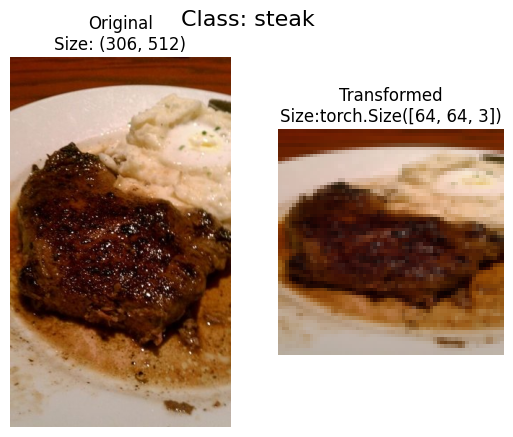

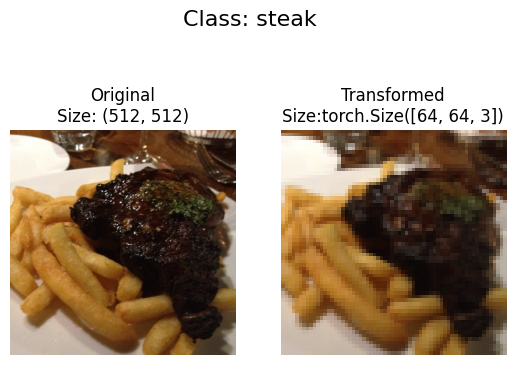

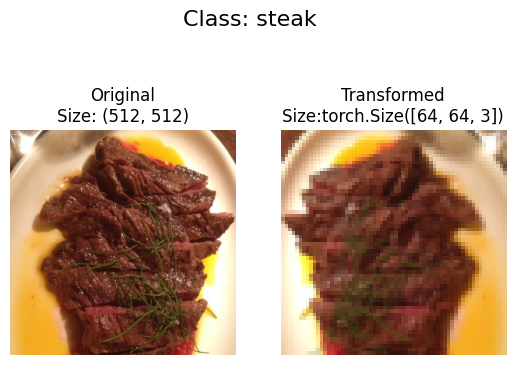

In [ ]:
def plot_transformed_images(image_paths, transforms, n=3, seed = None):
    ''' Selects random images froma  path of images and loads/ transforms them then plots the original vs the transformed version '''
    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original\nSize: {f.size}')
            ax[0].axis(False)

            # transform and plot the image
            transforms_image = transforms(f)
            permuted_tensor = transforms_image.permute(1,2,0)
            ax[1].imshow(permuted_tensor)
            ax[1].set_title(f'Transformed\nSize:{permuted_tensor.shape}')
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize= 16)

plot_transformed_images(image_paths=image_path_list, transforms=data_transorms)


#Loading the data
1. Loading image data using ImageFolder-> load image classification data using `torchvision.datasets.ImageFolder`

In [ ]:
# use ImageFolder from torchvision
from torchvision.datasets import ImageFolder
train_data = ImageFolder(root = train_dir,
                         transform=data_transorms,
                         target_transform = None, #a transform for target/label
                         )
test_data = datasets.ImageFolder(root= test_dir,
                                 transform=data_transorms)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img, label = train_data[0][0], train_data[0][1]
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [ ]:
label

0

In [ ]:
img1, label1 = test_data[1]
img1

tensor([[[0.1451, 0.1294, 0.1216,  ..., 0.2706, 0.2784, 0.2824],
         [0.1412, 0.1216, 0.1176,  ..., 0.2941, 0.2706, 0.2627],
         [0.1333, 0.1137, 0.1059,  ..., 0.2745, 0.2667, 0.2627],
         ...,
         [0.3725, 0.5804, 0.7333,  ..., 0.1647, 0.1843, 0.1882],
         [0.4431, 0.5608, 0.7412,  ..., 0.1647, 0.1843, 0.2078],
         [0.6235, 0.6353, 0.7255,  ..., 0.1608, 0.1922, 0.2078]],

        [[0.0706, 0.0706, 0.0667,  ..., 0.2627, 0.2745, 0.2706],
         [0.0745, 0.0706, 0.0667,  ..., 0.2863, 0.2706, 0.2627],
         [0.0706, 0.0706, 0.0627,  ..., 0.2706, 0.2627, 0.2471],
         ...,
         [0.1765, 0.2941, 0.5020,  ..., 0.1176, 0.1216, 0.1216],
         [0.2157, 0.2706, 0.5137,  ..., 0.1137, 0.1216, 0.1412],
         [0.3804, 0.3647, 0.4863,  ..., 0.1098, 0.1255, 0.1412]],

        [[0.0627, 0.0667, 0.0667,  ..., 0.1333, 0.1294, 0.1333],
         [0.0667, 0.0627, 0.0667,  ..., 0.1451, 0.1294, 0.1137],
         [0.0588, 0.0627, 0.0627,  ..., 0.1216, 0.1176, 0.

In [ ]:
label1

0

In [ ]:
# set up dataloader
Batch_size = 1
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset=train_data, batch_size=Batch_size, shuffle=True, num_workers=2, pin_memory=True)

test_data_loader = DataLoader(dataset=test_data, batch_size=Batch_size, shuffle=True, num_workers=2, pin_memory=True)


train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7ed510d2ec50>,
 <torch.utils.data.dataloader.DataLoader at 0x7ed4eb93d350>)

In [ ]:
len(train_data_loader), len(test_data_loader)

(225, 75)

In [ ]:
img, label = next(iter(train_data_loader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f'label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
label shape: torch.Size([1])


## optione 2 LOadingg image data with cutom  `dataset`
1. to able to load images from file
2. to able to get vlass names frim the Dataset
3. to able to get classes as dictionary from the dataset


Pros
* can create a `Dataset` out of almost anything
* Nor limited to PyTorch pre-built `Dataset` functions

cons:
* Even though you could create `Dataset` out of almost anything , it doens't mean it will work
* Using a custom Dataset often result in us writing more code, which could be prone to errors or performance issues

In [ ]:
import os
import pathlib
import PIL

from torch.utils.data import Dataset
from torchvision import transforms
from typing  import Tuple , Dict, List
from PIL import Image

### 5.1 Creating a helper function to get class names
we want a function to:
1. Get the class name using os.scandir() to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class name aren't found (if this happends, there might be something wrong with the
3. Turn the class names into a dict and a list and reutrn them



In [ ]:
# setup path for target directory

target_dir = Path('data/pizza_steak_sushi/train')
print(f"Targget dir: {target_dir}")

# get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
# list(os.scandir(image/target_dir))
if class_names_found:
    print(class_names_found)
else:
    print('No classes')

Targget dir: data/pizza_steak_sushi/train
['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory:str)-> Tuple[List[str], Dict[str, int]]:
    """Find the class folder name in a target directory"""
    # list of class name
    classes = sorted(entry.name for entry in list(os.scandir(directory)) if entry.is_dir())

    # Raise an error if class names colud not be found
    if not classes:
        raise FileNotFoundError(f"Could't found ant classes in {directory } please check file structure ... ")

    class_to_dict = {class_:i for i, class_ in enumerate(classes)}

    return classes,class_to_dict

In [ ]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.2 Creating a custom `dataset` to replicate `ImageFolder`

To create our own custom daataset ,we want to:
1. Subclass `torch.utils.data.Datset`
2. Init our subclass with a target  directory (the directory we'd like  to get date from) as well as a treansform if we'd like to trandform our data.
3. create several attributes:
    * paths - paths of our iamges
    * transform - the transform we'd like to use
    * classes  - a list of the target classes
    * class_to_idx - a dict of the target classes mapped to integet labels

4. create a function to `load_images()`, this function will open an image
5. overwrite the `__len()__` mathod to return the length of our dddataset
6. Overwrite the `__getitem()__` mwthodd to return a given sample when passed an index

In [ ]:
# Write a custoom dataset clss
from torch.utils.data import Dataset

# 1 Subclass the Dataset class
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir:str,transform=None ):
        super().__init__()
        #3. Create class atributes
        # get all of the image path
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # setup transforms
        self.transform = transform

        # create classes and class_to_idx attributes
        self.classes, self.classes_to_idx = find_classes(targ_dir)

    # 4 load image method
    def load_image(self, index:int)-> Image.Image:
        """opens an image via a path and returns it ."""
        image_path = self.paths[index]
        return Image.open(image_path)
    # 5 optional overrise __len__() method
    def __len__(self, )-> int:
        "Returns the total number of samples"
        return len(self.paths)

    # 6 requirement to override __getitem__ method
    def __getitem__(self, index:int)->Tuple[torch.Tensor, int]:
        " Returns one sample of data , data and label (X, y)"
        img = self.load_image(index=index)
        class_name = self.paths[index].parent.name # exprts path in formate: data_folder/class/images,jpg
        class_idx = self.classes_to_idx[class_name]

        # transform if necessary :
        if self.transform:
            return self.transform(img), class_idx # return (X as tensor , y as label
        else:
            return torch.tensor(img), class_idx


In [ ]:
# creat a transform
from torchvision import transforms

train_transform = transforms.Compose(
    [transforms.Resize(size = (64, 64)),
     transforms.RandomHorizontalFlip(p = 0.5),
     transforms.ToTensor()]
)
train_transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [ ]:
# for test data
test_transform = transforms.Compose(
    [transforms.Resize(size=(64, 64)),
     transforms.ToTensor()]
)


In [ ]:
str(train_dir)

'data/pizza_steak_sushi/train'

In [ ]:
# test out TmageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=str(train_dir), transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=str(test_dir), transform=test_transform)


In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7ed510d2ea50>,
 <__main__.ImageFolderCustom at 0x7ed510b46410>)

In [ ]:
len(train_data),len( train_data_custom)

(225, 225)

In [ ]:
len(test_data), len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes, train_data_custom.classes_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.3 Creat a dunctiooon to display random images

1. Take in a `Dataset` and a numer of other paramateres such as class names and how many images to visualize.
2. To prevent the diplay getting out of hand, let's cap the number of images to see at 10.
3. set the random seedd for reproducibility
4. Get a list of a random sample indexes form the target datasets.
5. Setup a matplotlib plot.
6. Loop through the random sample image and plot then with matplotlib
7. Make sure the dimensions of our images line up with matplotlib

In [ ]:
#1. Creat e functioon to take in a datset
def display_random_images(dataset : torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n:int = 10,
                          display_shape:bool = True,
                          seed: int = None):
    #2. Adjust display if n is too high

    if n>10:
        n=10
        display_shape = False
        print(f"For display, Purposes, n , shouldn, t be larger then 10, setting to 10")

    # 3. set the seed
    if seed:
        random.seed(seed)

    #4 Get random smaple indexes
    random_sample_indexes = random.sample(range(len(dataset)),k=n )

    #5 setup plot
    plt.figure(figsize=(16,8))

    # 6 lop thorughh random indexes and plot them with matplotlib

    # fig, ax= plt.subplots(5,2,figsize=(9, 9))
    for idx, targ_sample in enumerate(random_sample_indexes):
        targ_img , targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        #7  adjust tensor dimensions
        targ_image_adjust = targ_img.permute(1,2,0)

        # plot adjusted samples
        plt.subplot(1,n,idx+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)

        if classes:
            title = f"Class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape:{targ_image_adjust.shape}"
            plt.title(title)



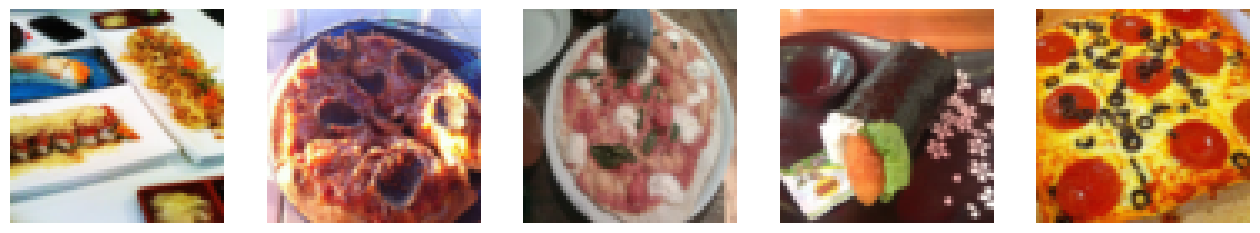

In [ ]:
display_random_images(train_data, n=5, seed=42)

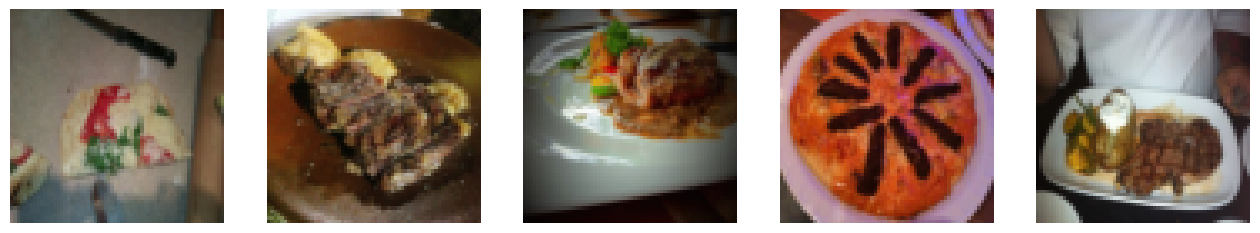

In [ ]:
display_random_images(train_data_custom, n=5, seed=42)

In [ ]:
# turning out custom Dataets into dataloader
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=1, shuffle=True, pin_memory=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size= 1, pin_memory=True)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7ed4ebb6a310>,
 <torch.utils.data.dataloader.DataLoader at 0x7ed4ebbb4b50>)

In [ ]:
len(iter(train_dataloader_custom)), len(iter(test_dataloader_custom))

(225, 75)

## 6. Other  forms of tranforms (data augmentation)
Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformation to the training images.
This practice hopefully results in a model that's more genralizable to unseen  data.


* important one - `TrivialAugmentWide()`



In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2144308.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3873283.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/894825.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1627703.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1016217.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/1285886.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg')]

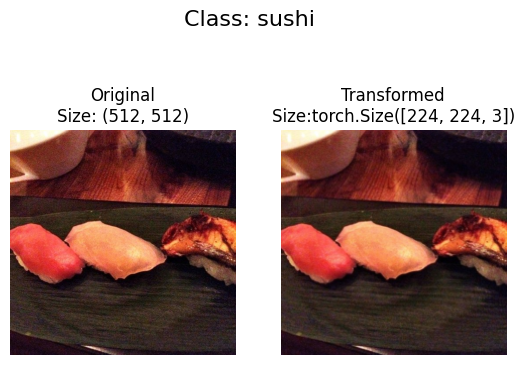

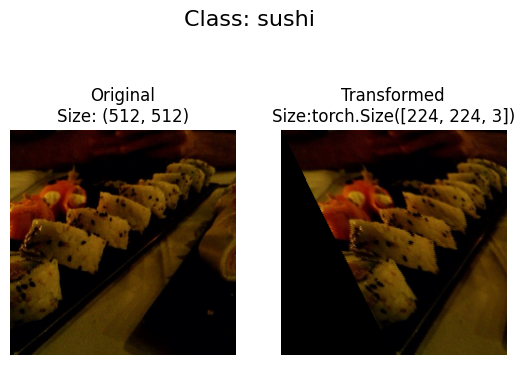

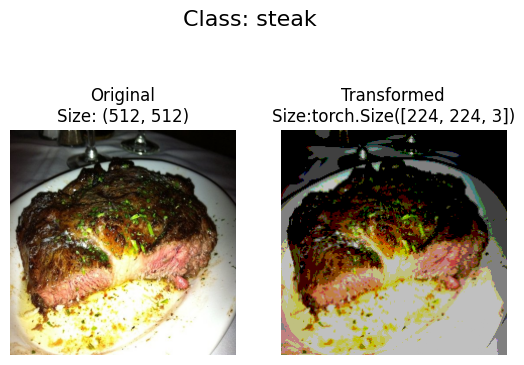

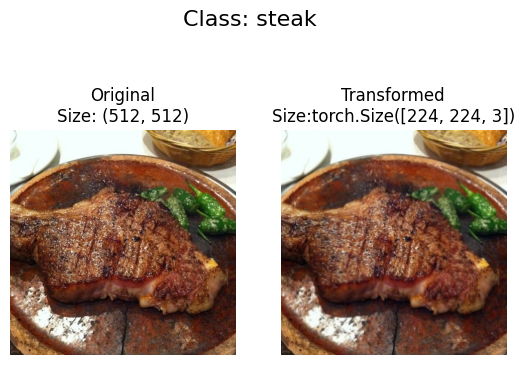

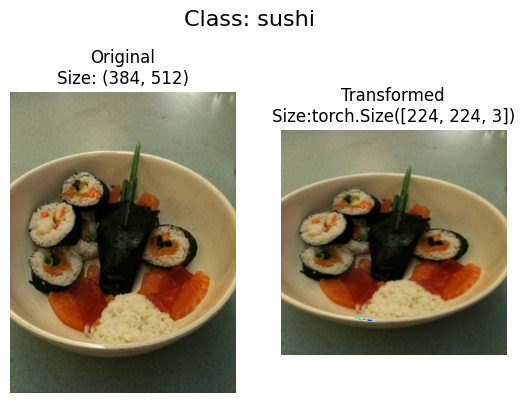

In [ ]:
# Plot random images
plot_transformed_images(image_paths=image_path_list, transforms=train_transform, n=5, seed =41)

# Building a baseline model

## create a simple transform and load the data for model0

In [ ]:
from torchvision import transforms, datasets

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
from pathlib import Path
train_data_path  = Path('data/pizza_steak_sushi/train')
test_data_path=  Path('data/pizza_steak_sushi/test')
train_data_path, test_data_path

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
from torch.utils.data import Dataset, DataLoader
train_dataset = datasets.ImageFolder(root = train_data_path, transform = simple_transform)
test_dataset = datasets.ImageFolder(root = test_data_path, transform=simple_transform)
train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
classe_names=train_data.classes
class_name_to_idx = train_data.class_to_idx

In [ ]:
import os
os.cpu_count()

2

In [ ]:
import os
from torch.utils.data import DataLoader

train_data_loader = DataLoader(dataset = train_dataset, batch_size= 8, shuffle=True, num_workers=2, pin_memory=True)
test_data_loader = DataLoader(dataset=test_dataset, batch_size = 8, shuffle=False, num_workers=2, pin_memory=True)

len(iter(train_data_loader)), 225/8, len(iter(test_data_loader)), 75/8

(29, 28.125, 10, 9.375)

## building a baseline model (CNN)

In [ ]:
from torch import nn

class FoodModelV0(nn.Module):
    def __init__(self, in_channels, hidden_channels, output_channels):
        super().__init__()
        self.conv_layer1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=hidden_channels,kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer2= nn.Sequential(
            nn.Conv2d(in_channels=hidden_channels, out_channels=hidden_channels, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_channels, out_channels=hidden_channels, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.categorize = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_channels*256, out_features=output_channels)
        )

    def forward(self, x):
        ### avoid this type of typing it takes more time
        # x= self.conv_layer1(x)
        # print(x.shape)
        # x = self.conv_layer2(x)
        # print(x.shape)
        # x = self.categorize(x)
        # print(x.shape)

        # benifits form operator fusion directorly computation is done
        return self.categorize(self.conv_layer2(self.conv_layer1(x))) # this computes results faster


In [ ]:
model_0 = FoodModelV0(in_channels=3, hidden_channels=128, output_channels=len(class_names))

In [ ]:
dummpy_tendor = torch.randn(size = [1,3,64,64])
dummpy_tendor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_0(dummpy_tendor)

tensor([[-0.0583,  0.0577,  0.0552]], grad_fn=<AddmmBackward0>)

In [ ]:
from torchsummary import summary
summary(model_0, (3, 64, 64), batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [1, 128, 64, 64]           3,584
              ReLU-2           [1, 128, 64, 64]               0
            Conv2d-3           [1, 128, 64, 64]         147,584
              ReLU-4           [1, 128, 64, 64]               0
         MaxPool2d-5           [1, 128, 32, 32]               0
            Conv2d-6           [1, 128, 32, 32]         147,584
              ReLU-7           [1, 128, 32, 32]               0
            Conv2d-8           [1, 128, 32, 32]         147,584
              ReLU-9           [1, 128, 32, 32]               0
        MaxPool2d-10           [1, 128, 16, 16]               0
          Flatten-11                 [1, 32768]               0
           Linear-12                     [1, 3]          98,307
Total params: 544,643
Trainable params: 544,643
Non-trainable params: 0
-------------------------------

In [ ]:
import tqdm

In [ ]:
#Creating Training and Testing loop functions

def Train_step(model:torch.nn.Module,
               train_data: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device="cpu"
               ):
    # put the model in train mode
    model.train()
    total_loss = 0
    total_acc = 0
    for batch, (X,y) in (enumerate(train_data)):
        # move tensors to device
        X = X.to(device,non_blocking=True)
        y = y.to(device, non_blocking=True)

        # forward_pass
        y_pred_logits = model(X)

        # claculate  the loss
        loss = loss_fn(y_pred_logits, y)

        if accuracy_fn:
            total_acc += accuracy_fn(y_pred_logits.argmax(dim=1), y)
        total_loss += loss.item()

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backpropogation
        loss.backward()

        # optimizer step
        optimizer.step()
    total_loss /= len(train_data)
    total_acc /= len(train_data)
    print(f"train loss : {total_loss:.2f} | train accuracy :{total_acc:.2f}")
    return total_loss, total_acc



In [ ]:
def Test_step(
        model: torch.nn.Module,
        test_dataloader: torch.utils.data.DataLoader,
        loss_fn : nn.Module,
        accuracy_fn=None,
        device='cpu'
        ):
    model.eval()

    total_loss = 0
    total_acc = 0
    for X,y in (test_dataloader):
        X = X.to(device, non_blocking=True)
        y= y.to(device, non_blocking=True)
        with torch.inference_mode():
            y_pred_logits = model(X)
            loss = loss_fn(y_pred_logits, y)
            total_loss+= loss.item()
            if accuracy_fn:
                total_acc += accuracy_fn(y_pred_logits.argmax(dim=1), y)
    total_loss /= len(test_dataloader)
    total_acc /= len(test_dataloader)

    print(f"test loss: {total_loss:.2f} | test accuracy : {total_acc:.2f}")
    return total_loss, total_acc



In [ ]:



from tqdm.auto import tqdm
def train_model(
        model:torch.nn.Module,
        train_dataloader: torch.utils.data.DataLoader,
        test_dataloader: torch.utils.data.DataLoader,
        loss_fn:nn.Module,
        optimizer:torch.optim.Optimizer,
        epoches = 5,
        accuracy_fn=None,
        device='cpu'):
    #set up optimizer
    # try dynamically addding model paramenter to optimizer

    # make results to save the results of training and testing steps
    results = {
        'train_loss' :[],
        'train_acc' :[],
        'test_loss' :[],
        'test_acc' :[]
    }

    for epoch in tqdm(range(epoches)):
        print(f"Epoch : {epoch+1} ------------------")
        train_loss, train_acc = Train_step(model = model, train_data= train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
        test_loss, test_acc  = Test_step(model = model , test_dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results





In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

def accuracy_fn(y_pred, y_act):
    return torch.eq(y_pred, y_act).sum().item()*100/ len(y_act)


In [ ]:
results_dict = train_model(model= model_0,
            train_dataloader= train_data_loader,
            test_dataloader = test_data_loader,
            loss_fn = loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn,
            epoches=10,
            device= 'cpu'
            )

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch : 1 ------------------
train loss : 1.10 | train accuracy :35.78
test loss: 1.11 | test accuracy : 25.00
Epoch : 2 ------------------
train loss : 1.08 | train accuracy :38.79
test loss: 1.10 | test accuracy : 23.75
Epoch : 3 ------------------
train loss : 1.10 | train accuracy :32.76
test loss: 1.10 | test accuracy : 23.75
Epoch : 4 ------------------
train loss : 1.10 | train accuracy :32.33
test loss: 1.10 | test accuracy : 23.75
Epoch : 5 ------------------
train loss : 1.10 | train accuracy :29.31
test loss: 1.10 | test accuracy : 31.25
Epoch : 6 ------------------
train loss : 1.10 | train accuracy :30.17
test loss: 1.10 | test accuracy : 23.75
Epoch : 7 ------------------
train loss : 1.10 | train accuracy :31.90
test loss: 1.10 | test accuracy : 31.25
Epoch : 8 ------------------
train loss : 1.10 | train accuracy :36.64
test loss: 1.10 | test accuracy : 31.25
Epoch : 9 ------------------
train loss : 1.10 | train accuracy :33.62
test loss: 1.10 | test accuracy : 31.25
E

### Plot the loss curve of the model_0
A **loss curve** is a way of tracking your model's progess over time.
<!-- A good guide for different loss curve                                            -->

In [ ]:
# get the model_0_result keys
results_dict.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """ plots training curves of a results dictionary."""

    # Get the loss values of the results dictionary (training andd test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # get the accuracy values of the results dictionary (training and test)
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # figure out how namy epoches there was
    epoches = range(len(loss))

    #setup a plot
    plt.figure(figsize = (15,7))

    # plt the loss
    plt.subplot(1,2,1)
    plt.plot(epoches, loss, label='train_loss')
    plt.plot(epoches, test_loss, label='test_loss')
    plt.title("loss")
    plt.xlabel('Epoches')
    plt.ylabel('loss')
    plt.legend()

    # plot the accuracy
    plt.subplot(1,2,2)
    plt.plot(epoches, accuracy, label='Trian_acc')
    plt.plot(epoches, test_accuracy, label='Test_acc')
    plt.title('accuracy')
    plt.xlabel('Epoches')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

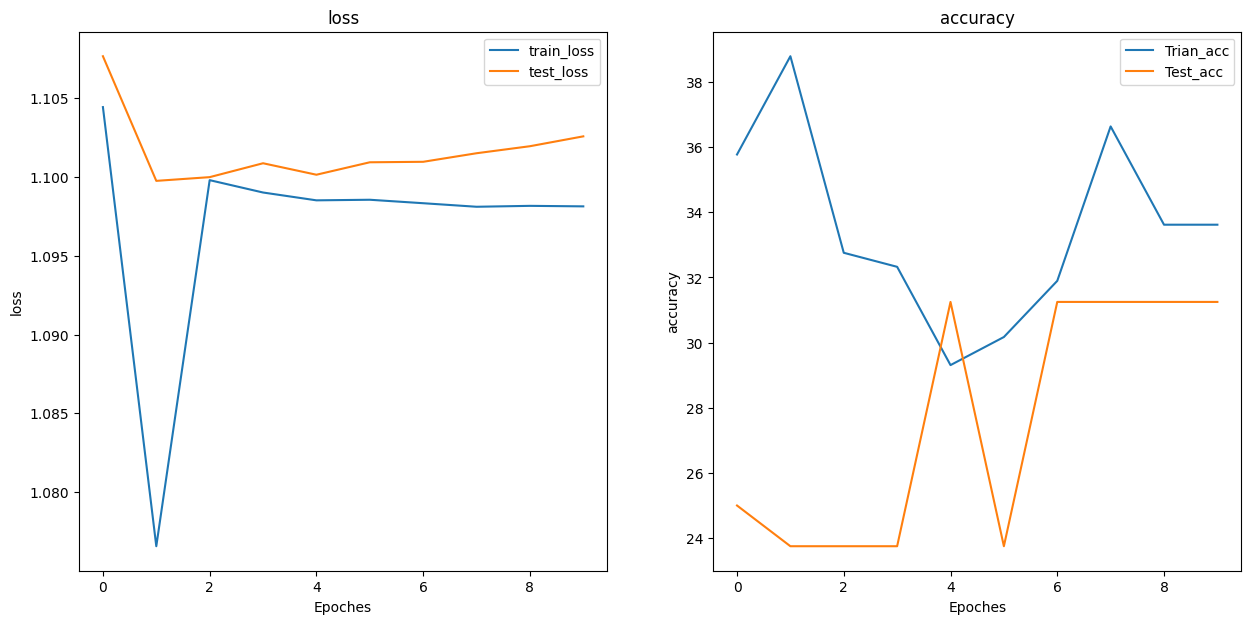

In [ ]:
plot_loss_curves(results=results_dict)